In [10]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time
import datetime

#saving data 
import pickle

import mdtraj as md

from MDPlus import fastfitting

In [11]:
def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print filename, " is now loaded"
        #print obj.shape
        return k;
    
def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'b.')
        
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'r^') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'ro')
    
    if rmsd_index_list!=0:
        #plot the 5 traj states that are closest to DE Shaw 5 most visted states
        plt.plot(pByIters[0][0][rmsd_index_list[:]],pByIters[0][1][rmsd_index_list[:]], 'wo')

    return pByIters;


def plot_cofasu_tot2(p,pByIters,iters,prj,fileprefix,fileExt,dermsd_index_list, cap, rmsd_index_list=0, offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt

    fig = plt.figure(figsize=(9,4))
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'k.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'b.')
        
    # plot the 5 most visited/ stable states DE Shaw found from their sim
    plt.plot(p.projs[0][11155],p.projs[3][11155], 'r^') # starting structure
    plt.plot(p.projs[0][dermsd_index_list[:]],p.projs[3][dermsd_index_list[:]], 'ro')
    
    if rmsd_index_list!=0:
        #plot the 5 traj states that are closest to DE Shaw 5 most visted states
        plt.plot(pByIters[0][0][rmsd_index_list[:]],pByIters[0][1][rmsd_index_list[:]], 'wo')

    return ;

In [27]:
names = [ 'p07e01_k12_00010_k34_00100_tx2', 'p07e01_k12_00100_k34_00100_tx2'  , 'p07e01_k12_00100_k34_01000_4d',
          'p07e01_k12_00100_k34_01000_mdtx2', 'p07e01_k12_01000_k34_01000_tx2', 'p07e01_k12_00100_k34_01000_itx2' ]

#names = [ 'p07e01_k12_00100_k34_01000_4d']

In [28]:
#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### min analysis function                ########################

def min_log_posre_all_iters(N,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    ind = 12
    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    if normal=='normalize':
        plt.title(prj+"     "+"min_log_posre_all_iters"+ " "+'normalized')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][ind])/float(N[lm][0][ind]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"min_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][ind]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    
    return N;

 ###################################################
 #       p07e01_k12_00010_k34_00100_tx2     starts here               #
 ##################################################
iters = 20


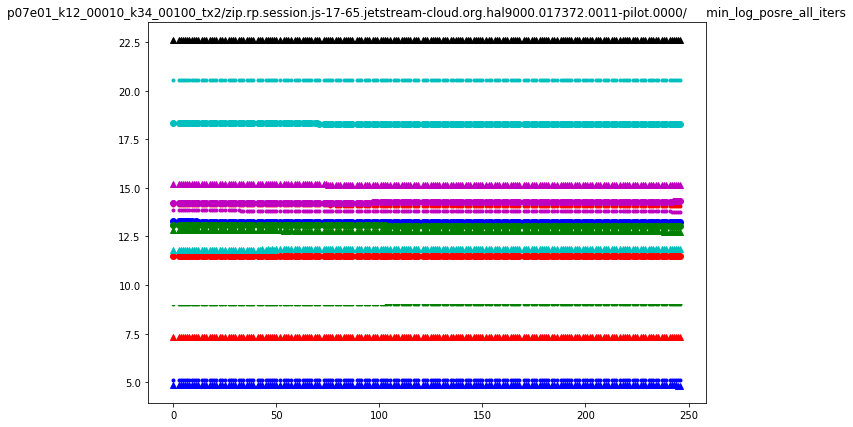

 ###################################################
 #       p07e01_k12_00100_k34_00100_tx2     starts here               #
 ##################################################
iters = 19
iters = 18


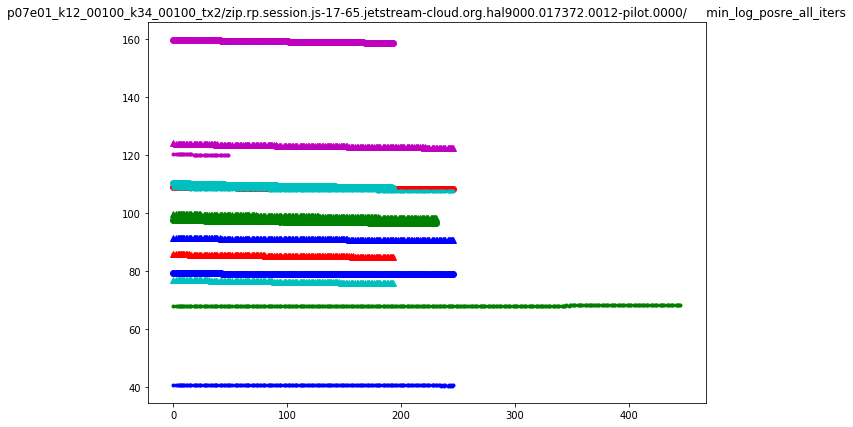

 ###################################################
 #       p07e01_k12_00100_k34_01000_4d     starts here               #
 ##################################################
iters = 20


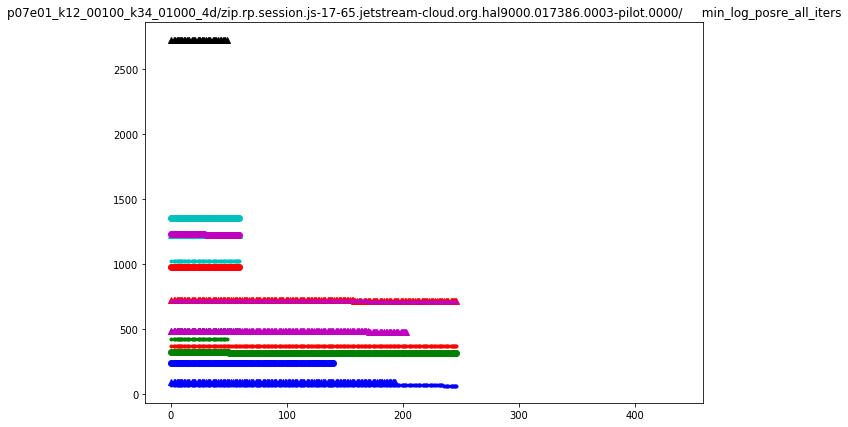

 ###################################################
 #       p07e01_k12_00100_k34_01000_mdtx2     starts here               #
 ##################################################
iters = 20


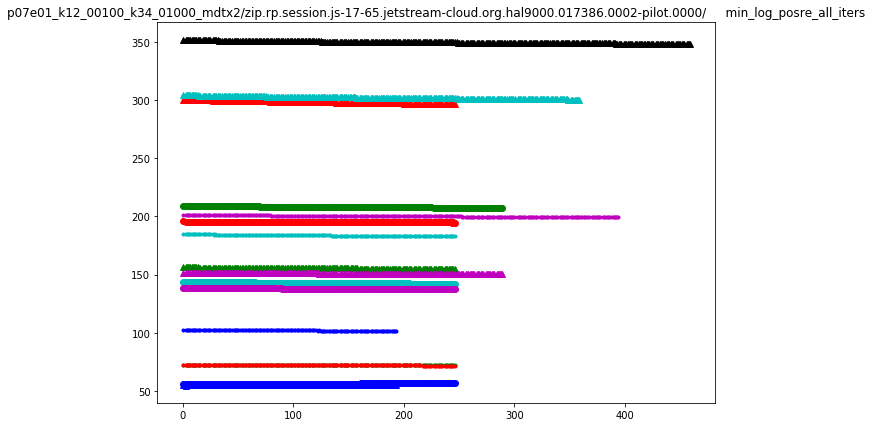

 ###################################################
 #       p07e01_k12_01000_k34_01000_tx2     starts here               #
 ##################################################
iters = 20


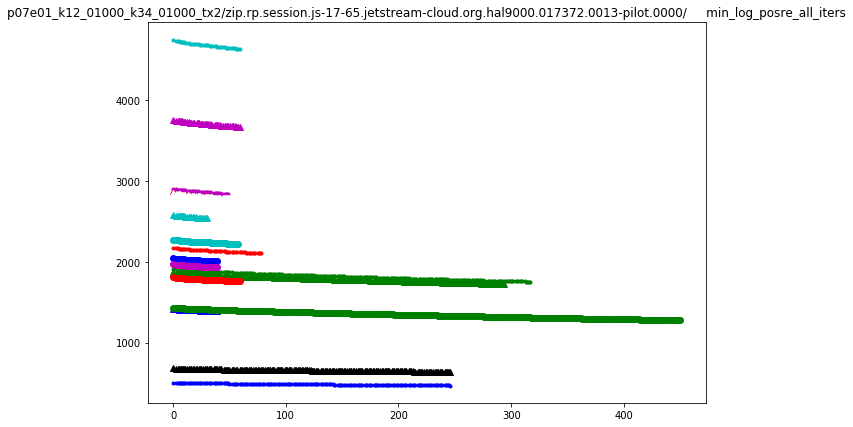

 ###################################################
 #       p07e01_k12_00100_k34_01000_itx2     starts here               #
 ##################################################
iters = 38
iters = 37


IndexError: list index out of range

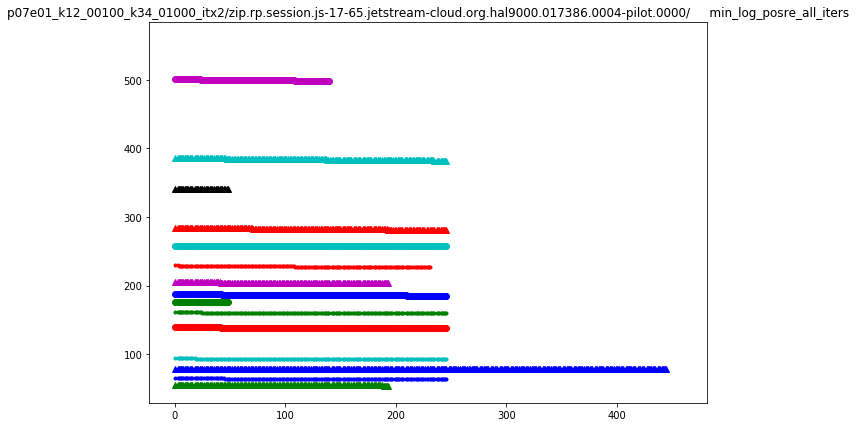

In [30]:

for i in range(len(names)):
     
        
        
    dirname = names[i]

    reqe =6
    print " ###################################################"
    print " #      ", names[i], "    starts here               #"
    print " ##################################################"
 
    # no need to touch
    cu = 20 
    iters = 20
    cores = 200
    top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
    atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

    folder = dirname+"/"

    path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
#print path_to_zip
#print type(path_to_zip)
#print path_to_zip[0].split("/")[-1]
#print path_to_zip[0].split("/")[-1].split("-pilot.0000")

    rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
    zipfolder = rpname+ '-pilot.0000/'
    prj = folder + zipfolder
    path   = atm+prj
    pathSt = atm+prj+"staging"
    pathCu = atm+prj+"cu009"
#print path


#print " "
#print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
#print path_to_cu
#print len(path_to_cu)
    
    iters = int(len(path_to_cu))+2
    print 'iters =', iters
    if names[i]=="p07e01_k12_00100_k34_00100_tx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    

    if names[i]=="p07e01_k12_00100_k34_01000_itx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    
    
    #################### analysis of min*.log                   #####################
    # Position restraint energy vs time data 
    #################################################################################


    # plots of position restrain energy change over time for K1/K2 
    # uses min-[0-19]_9.log for plotting. 
    N=[]
    # plots raw pos res energy 
    # x axis is time steps and y axis is KJ/mol
    min_log_posre_all_iters(N,iters,pathCu,prj);
    #N=[]
    # plots pos res energy normalized by the pos res energy at step=0
    # x axis is time steps and y axis is KJ/mol
    #min_log_posre_all_iters(N,iters,pathCu,prj,'normalize');
    
    
    plt.show()
    


    

In [ ]:
class prettyfloat(float):
    def __repr__(self):
        return "%.3f" % self




In [36]:
#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### min analysis function                ########################

def min_log_posre_all_iters(N,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    ind = 12
    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    if normal=='normalize':
        plt.title(prj+"     "+"min_log_posre_all_iters"+ " "+'normalized')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),(float(N[lm][i][ind])-float(N[lm][0][ind]))/float(N[lm][0][ind]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"min_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][ind]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    
    return N;

 ###################################################
 #       p07e01_k12_00010_k34_00100_tx2     starts here               #
 ##################################################
iters = 20


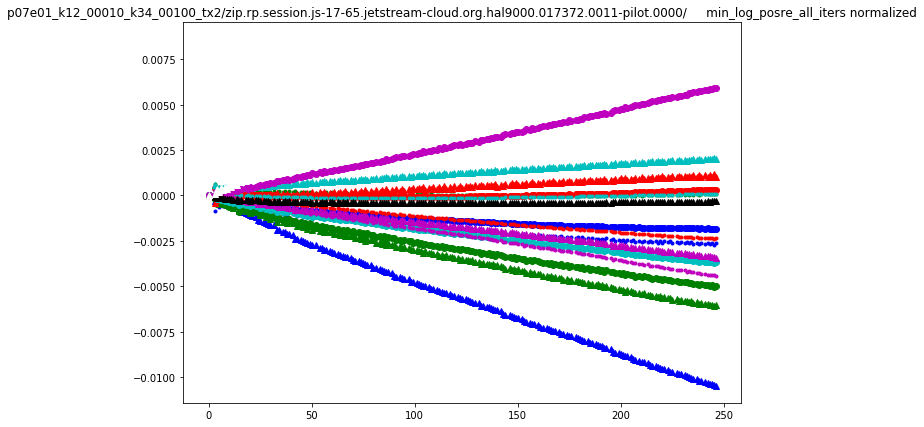

 ###################################################
 #       p07e01_k12_00100_k34_00100_tx2     starts here               #
 ##################################################
iters = 19
iters = 18


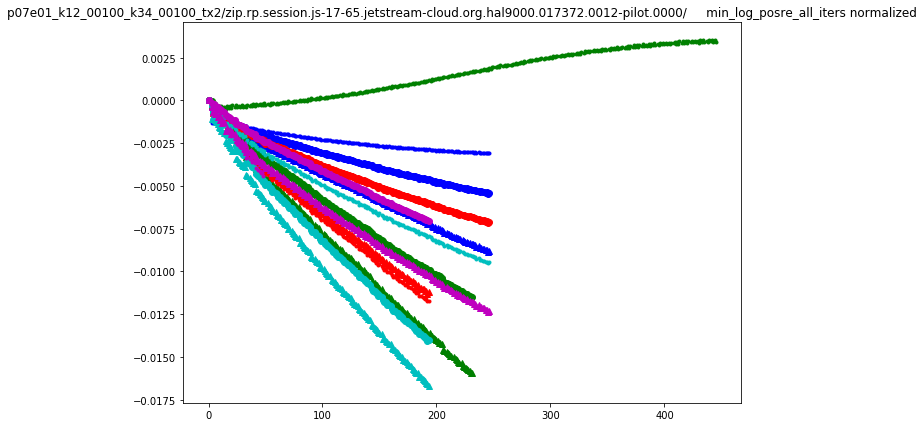

 ###################################################
 #       p07e01_k12_00100_k34_01000_4d     starts here               #
 ##################################################
iters = 20


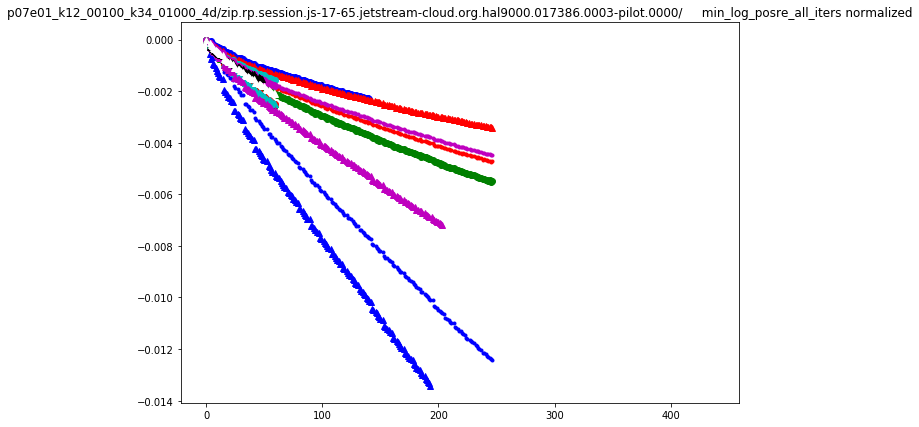

 ###################################################
 #       p07e01_k12_00100_k34_01000_mdtx2     starts here               #
 ##################################################
iters = 20


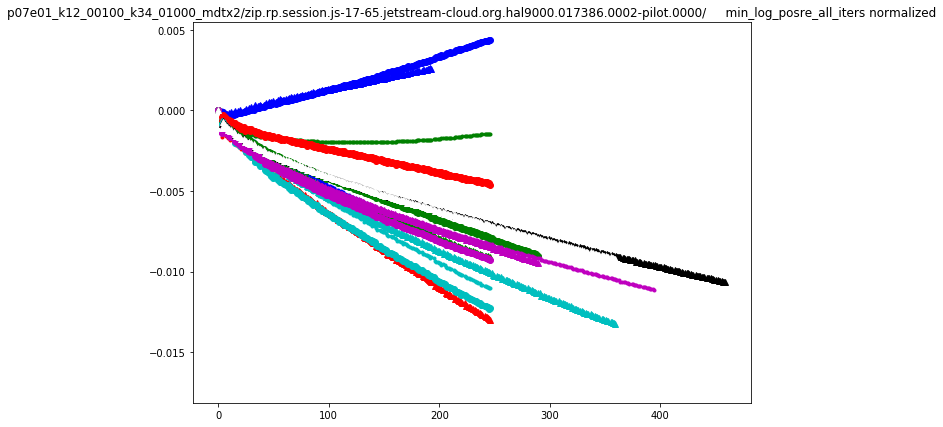

 ###################################################
 #       p07e01_k12_01000_k34_01000_tx2     starts here               #
 ##################################################
iters = 20


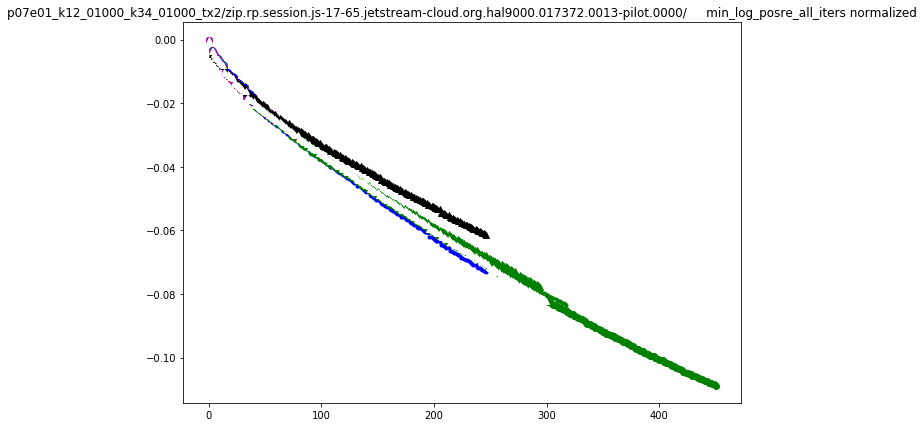

 ###################################################
 #       p07e01_k12_00100_k34_01000_itx2     starts here               #
 ##################################################
iters = 38
iters = 37


IndexError: list index out of range

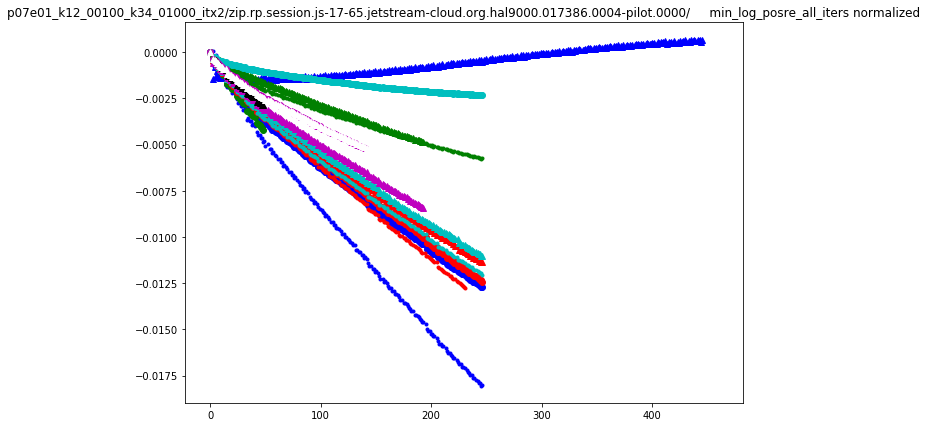

In [37]:
for i in range(len(names)):
     
        
        
    dirname = names[i]

    reqe =6
    print " ###################################################"
    print " #      ", names[i], "    starts here               #"
    print " ##################################################"
 
    # no need to touch
    cu = 20 
    iters = 20
    cores = 200
    top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
    atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

    folder = dirname+"/"

    path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
#print path_to_zip
#print type(path_to_zip)
#print path_to_zip[0].split("/")[-1]
#print path_to_zip[0].split("/")[-1].split("-pilot.0000")

    rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
    zipfolder = rpname+ '-pilot.0000/'
    prj = folder + zipfolder
    path   = atm+prj
    pathSt = atm+prj+"staging"
    pathCu = atm+prj+"cu009"
#print path


#print " "
#print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
#print path_to_cu
#print len(path_to_cu)
    
    iters = int(len(path_to_cu))+2
    print 'iters =', iters
    if names[i]=="p07e01_k12_00100_k34_00100_tx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    

    if names[i]=="p07e01_k12_00100_k34_01000_itx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    
    
    #################### analysis of min*.log                   #####################
    # Position restraint energy vs time data 
    #################################################################################


    # plots of position restrain energy change over time for K1/K2 
    # uses min-[0-19]_9.log for plotting. 
    #N=[]
    # plots raw pos res energy 
    # x axis is time steps and y axis is KJ/mol
    #min_log_posre_all_iters(N,iters,pathCu,prj);
    N=[]
    # plots pos res energy normalized by the pos res energy at step=0
    # x axis is time steps and y axis is KJ/mol
    min_log_posre_all_iters(N,iters,pathCu,prj,'normalize');
    
    
    plt.show()
    


In [38]:
#################### analysis of eq*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### eq analysis function                ########################

def eq_log_posre_all_iters(M,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="eq-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[399].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q):
                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        M.append(m)


    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 2))
    if normal=='normalize':
        plt.title(prj+"     "+"eq_log_posre_all_iters"+" "+'normalize')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][8])/float(M[lm][0][8]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"eq_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][8]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return M;




 ###################################################
 #       p07e01_k12_00010_k34_00100_tx2     starts here               #
 ##################################################
iters = 20


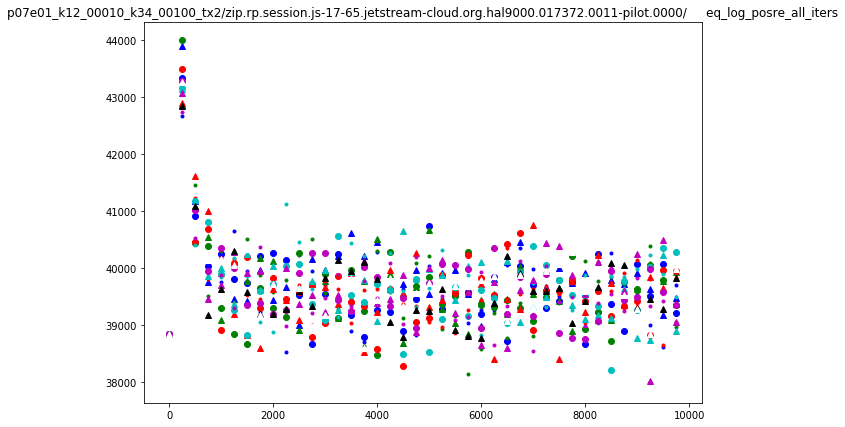

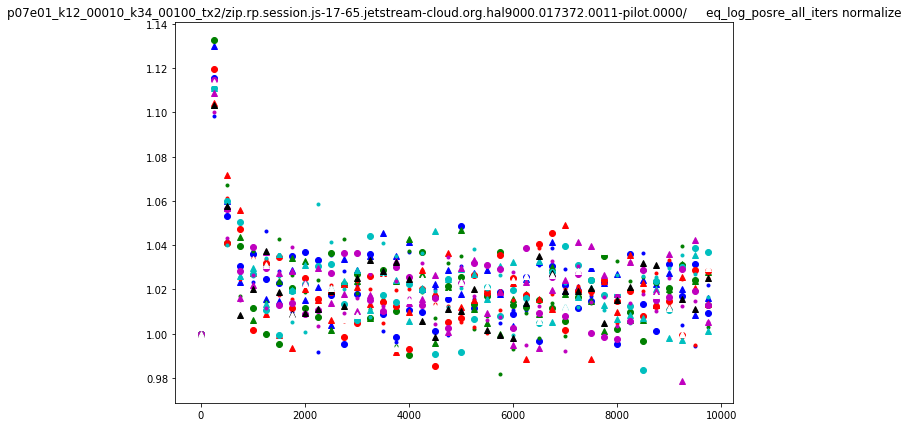

 ###################################################
 #       p07e01_k12_00100_k34_00100_tx2     starts here               #
 ##################################################
iters = 19
iters = 18


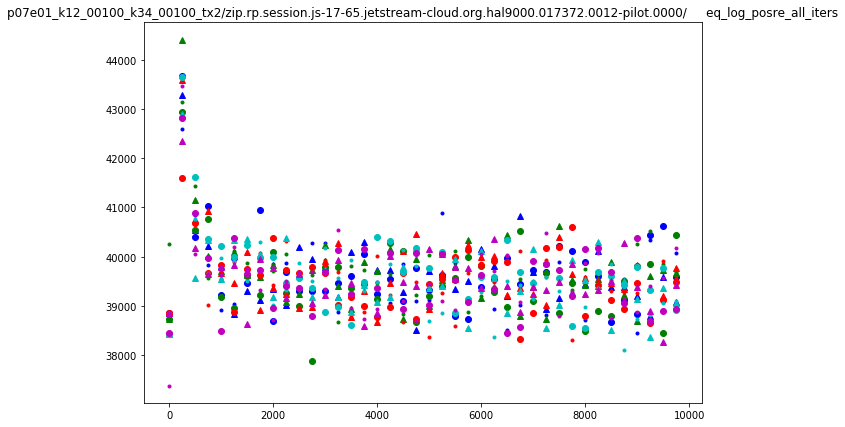

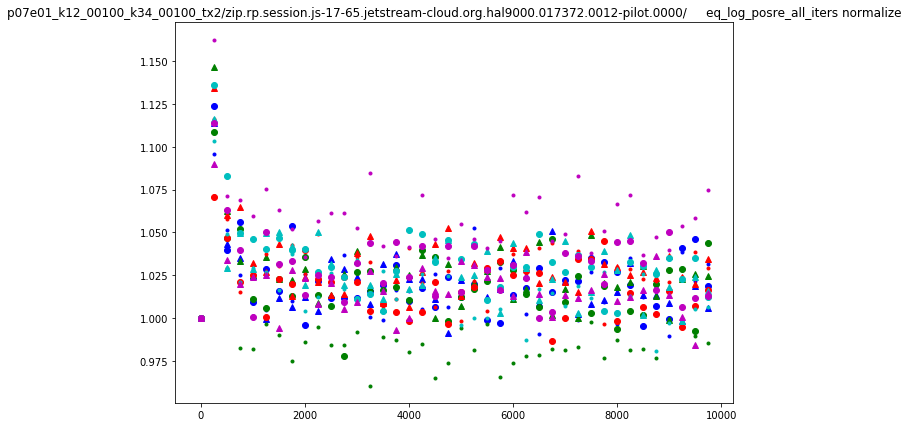

 ###################################################
 #       p07e01_k12_00100_k34_01000_4d     starts here               #
 ##################################################
iters = 20


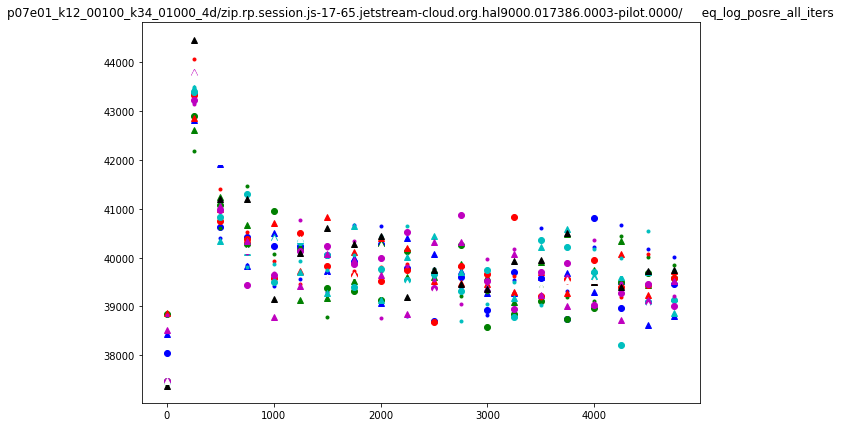

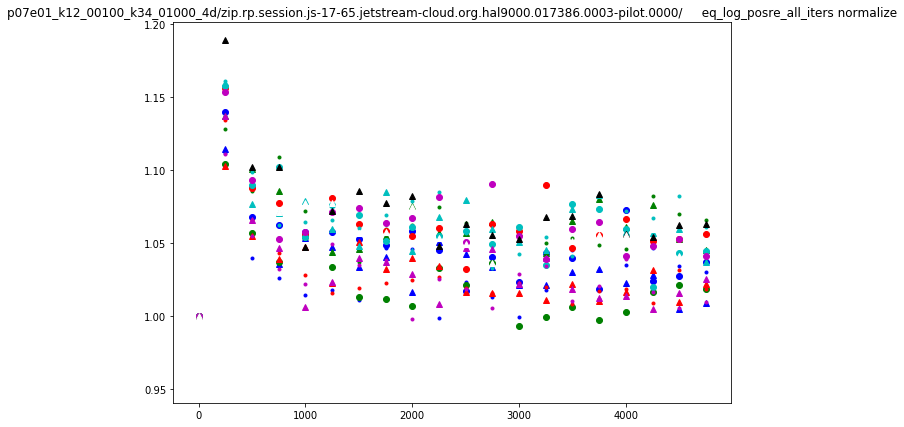

 ###################################################
 #       p07e01_k12_00100_k34_01000_mdtx2     starts here               #
 ##################################################
iters = 20


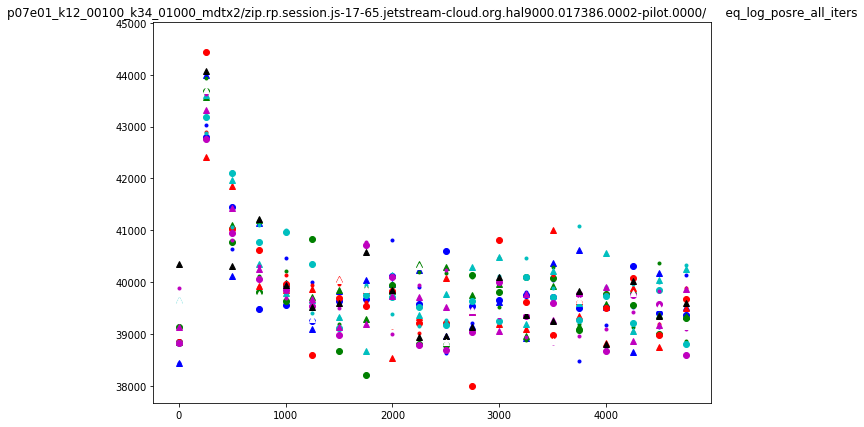

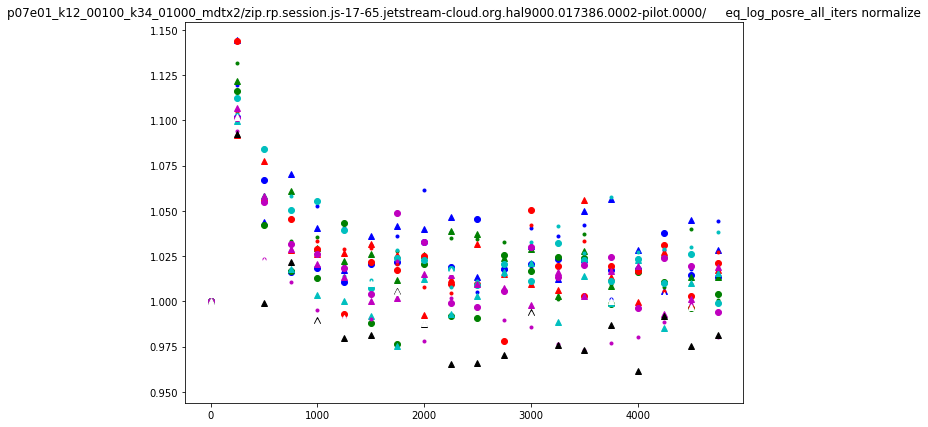

 ###################################################
 #       p07e01_k12_01000_k34_01000_tx2     starts here               #
 ##################################################
iters = 20


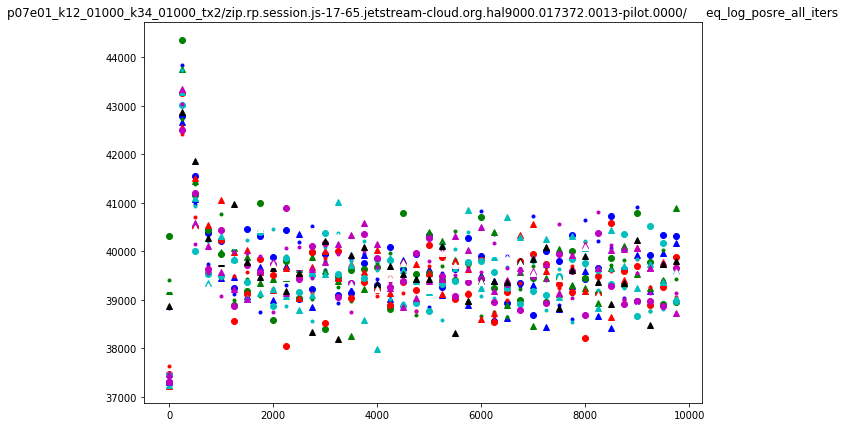

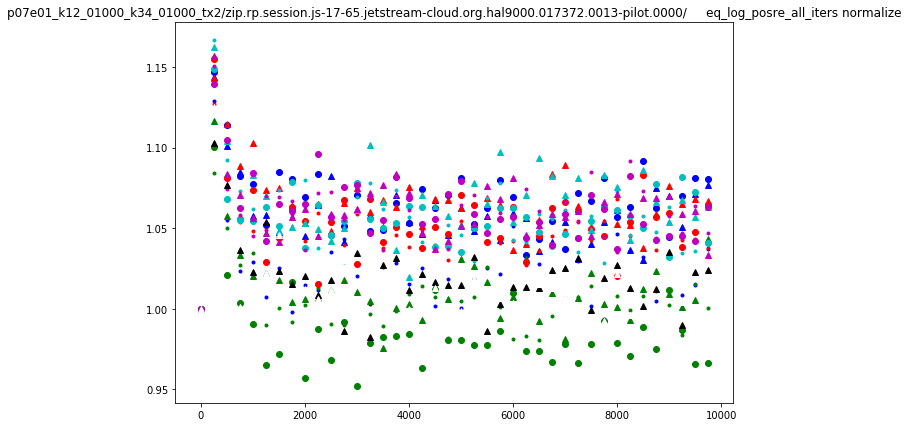

 ###################################################
 #       p07e01_k12_00100_k34_01000_itx2     starts here               #
 ##################################################
iters = 38
iters = 37


IOError: [Errno 2] No such file or directory: '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_00100_k34_01000_itx2/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0004-pilot.0000/cu009/eq-19_9.log'

In [39]:
for i in range(len(names)):
     
        
        
    dirname = names[i]

    reqe =6
    print " ###################################################"
    print " #      ", names[i], "    starts here               #"
    print " ##################################################"
 
    # no need to touch
    cu = 20 
    iters = 20
    cores = 200
    top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
    atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

    folder = dirname+"/"

    path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
#print path_to_zip
#print type(path_to_zip)
#print path_to_zip[0].split("/")[-1]
#print path_to_zip[0].split("/")[-1].split("-pilot.0000")

    rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])
    zipfolder = rpname+ '-pilot.0000/'
    prj = folder + zipfolder
    path   = atm+prj
    pathSt = atm+prj+"staging"
    pathCu = atm+prj+"cu009"
#print path


#print " "
#print "path to cu"
    path_to_cu = glob.glob(atm+folder+zipfolder+"/cu009/"+"min-*_9.log")
#print path_to_cu
#print len(path_to_cu)
    
    iters = int(len(path_to_cu))+2
    print 'iters =', iters
    if names[i]=="p07e01_k12_00100_k34_00100_tx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    

    if names[i]=="p07e01_k12_00100_k34_01000_itx2":
        iters = int(len(path_to_cu))+2-1
        print 'iters =', iters
    

    #################### eq analysis               ########################


    # plots of position restrain energy change over time for K3/K4 
    # uses eq-[0-19]_9.log for plotting. 
    M = []
    # plots raw pos res energy 
    # x axis is time steps and y axis is KJ/mol
    eq_log_posre_all_iters(M,iters,pathCu,prj);
    M = []
    # plots pos res energy normalized by the pos res energy at step=0
    # # x axis is time steps and y axis is KJ/mol
    eq_log_posre_all_iters(M,iters,pathCu,prj,'normalize');
    
    plt.show()
    